In [1]:
# GET DATA
import os
import matplotlib.pyplot as plt

!git clone https://github.com/shariqfz/knowledge-graph-question-answering-imdb1000.git

data_path = '/content/knowledge-graph-question-answering-imdb1000/data/IMDB-Movie-Data.csv'

fatal: destination path 'knowledge-graph-question-answering-imdb1000' already exists and is not an empty directory.


In [2]:

%%capture

!pip install torch_geometric
!pip install farm-haystack

In [3]:
import pandas as pd
import networkx as nx

# Load the data
data_path = '/content/knowledge-graph-question-answering-imdb1000/data/IMDB-Movie-Data.csv'
df = pd.read_csv(data_path)

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges based on your data
for index, row in df.iterrows():
    movie = row['Title'].strip()
    # G.add_node(movie, title=movie, genre=row['Genre'], director=row['Director'], actors=row['Actors'], year=row['Year'])
    G.add_node(movie,class_type="movie")

    # Add edges between movie and genres
    for genre in row['Genre'].split(','):
        if not G.has_node(genre):
            G.add_node(genre,class_type="genre")
        G.add_edge(movie, genre, relation='belongs to')
        G.add_edge(genre, movie, relation='has')

    # Add edges between movie and director
    director = row['Director'].strip()
    if not G.has_node(director):
        G.add_node(director,class_type="director")
    G.add_edge(movie, director, relation='directed by')
    G.add_edge(director, movie, relation='directed')

    # Add edges between movie and actors
    for actor in row['Actors'].split(','):
        actor=actor.strip()
        if not G.has_node(actor):
            G.add_node(actor,class_type="actor")
        G.add_edge(actor, movie, relation='acted in')
        G.add_edge(movie, actor, relation='casts')

    # Add edge between movie and year
    year = row['Year']
    if not G.has_node(year):
        G.add_node(year,class_type="year")
    G.add_edge(movie, year, relation='was made in')
    G.add_edge(year, movie, relation='movies made')



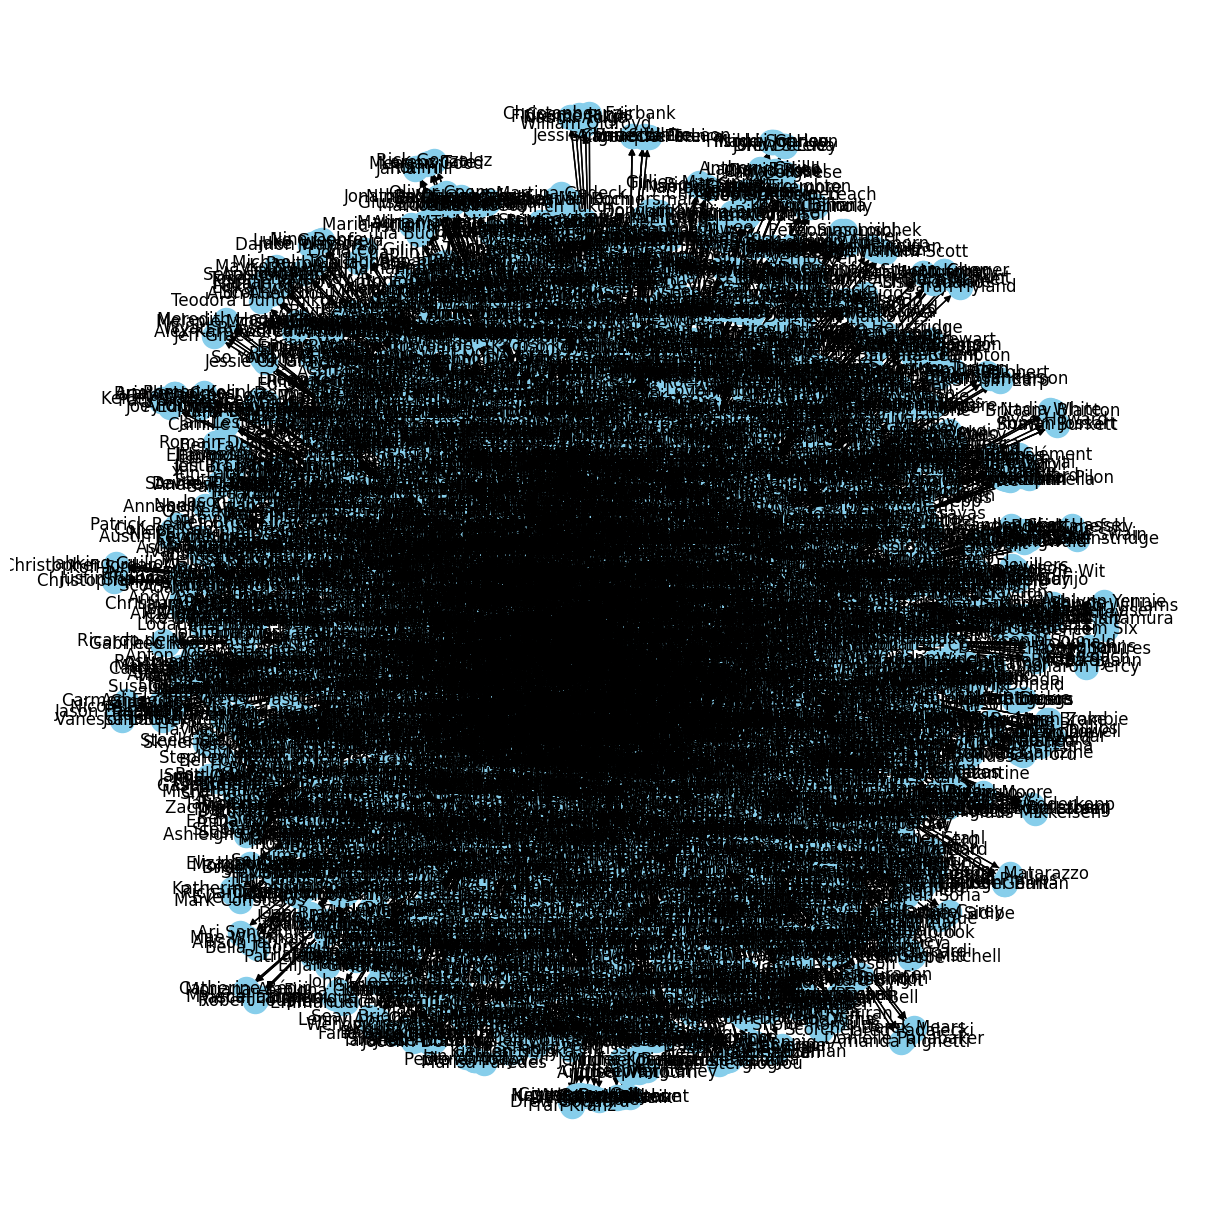

In [4]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [5]:
# Create an empty directed graph for the subgraph
sub_G = nx.DiGraph()

# Iterate over all edges in your original graph
for u, v, data in G.edges(data=True):
    # Check if the edge has the desired attribute
    if data['relation'] in ['directed by', 'directed']:
        # If it does, add it to the subgraph
        sub_G.add_edge(u, v, relation=data['relation'])

# Now, sub_G is a subgraph of G with only the edges that have the 'directed by' or 'directed' relation

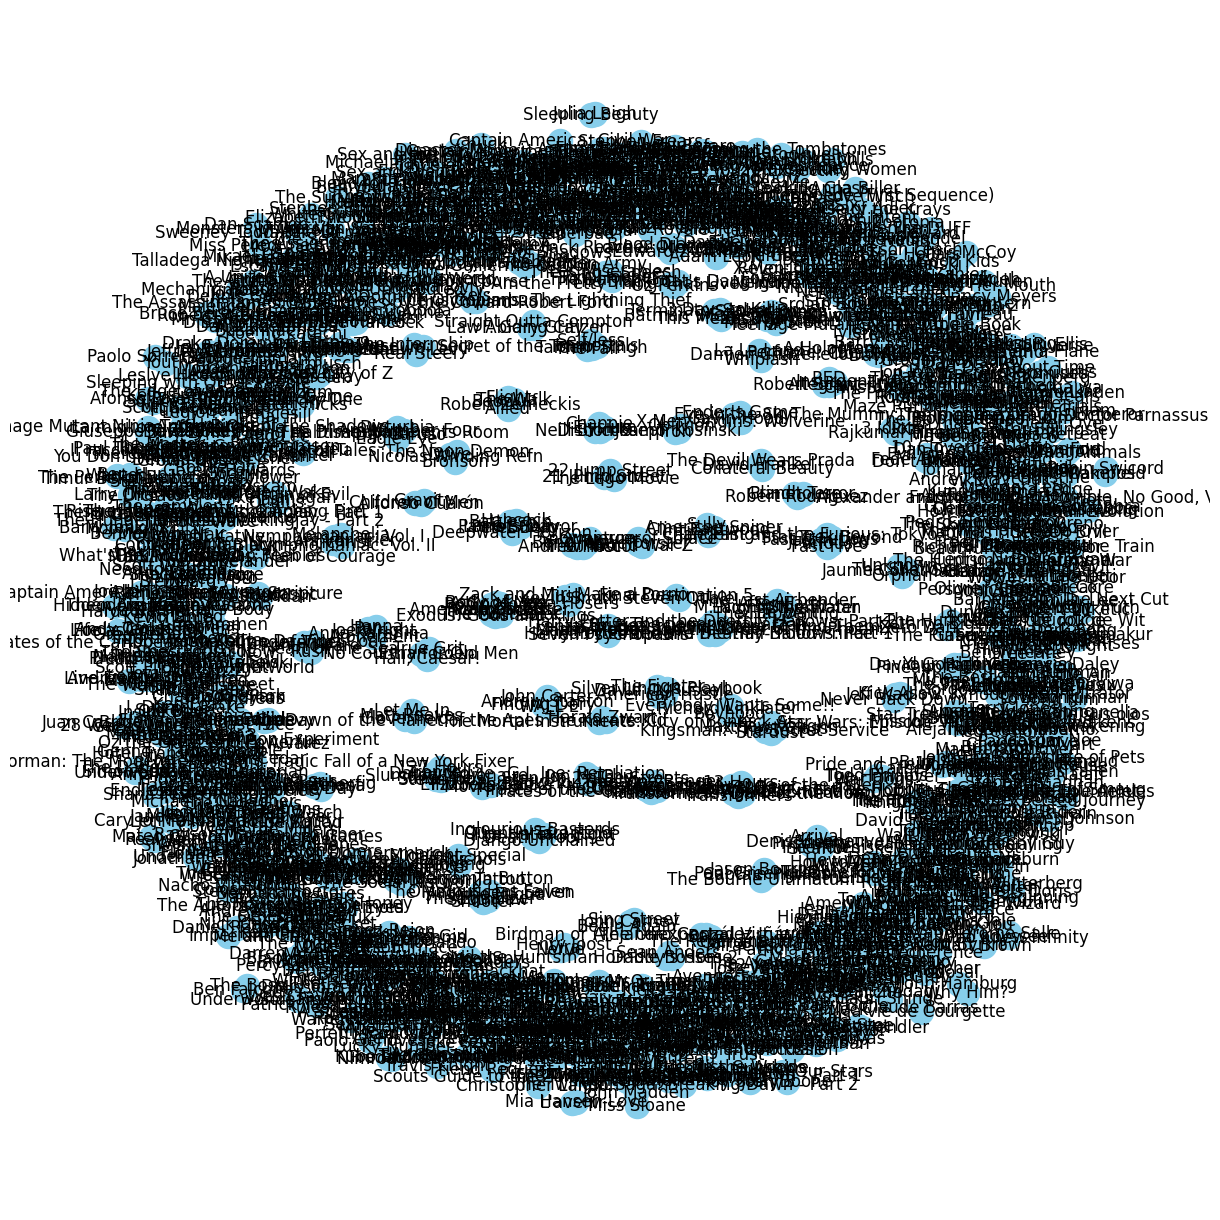

In [6]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(sub_G)
nx.draw(sub_G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

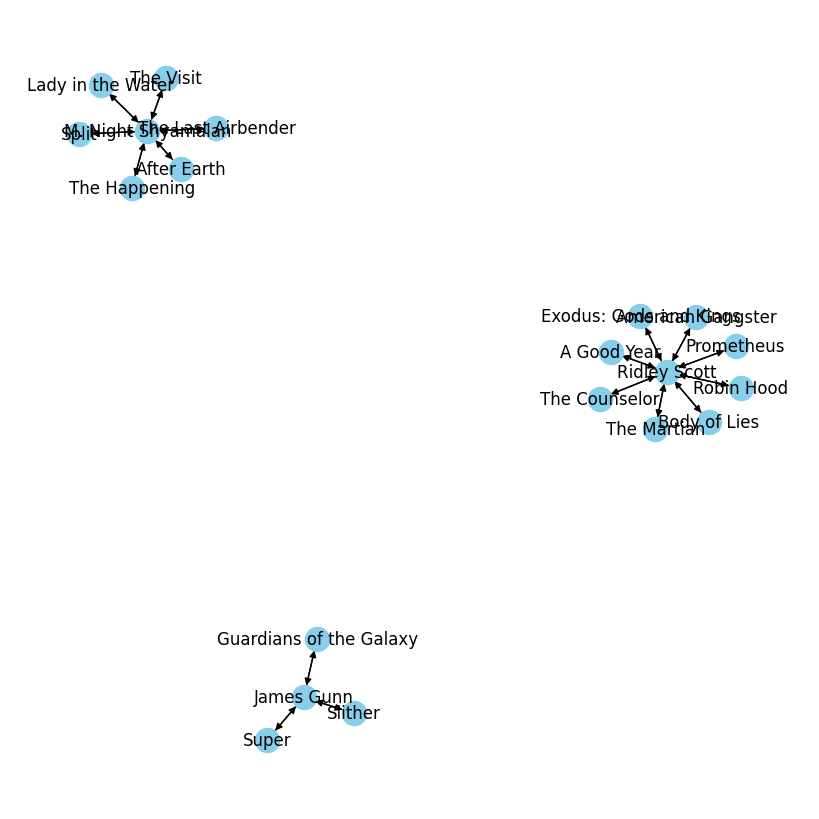

In [7]:
# Create an empty directed graph for the subgraph
sub_G = nx.DiGraph()

# Iterate over all edges in your original graph
for u, v, data in G.edges(data=True):
    # Check if the edge has the desired attribute
    if data['relation'] in ['directed']:
        # If it does, add it to the subgraph
        sub_G.add_edge(u, v, relation=data['relation'])

# Get a list of all nodes in your original graph
nodes = list(sub_G.nodes())

# Select a subset of nodes for your subgraph
# For example, you can select the first 100 nodes
smaller_nodes = nodes[:20]

# Create the subgraph
smaller_G = G.subgraph(smaller_nodes)

plt.figure(figsize=(8,8))

pos = nx.spring_layout(smaller_G)
nx.draw(smaller_G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [8]:
list(G.edges)[:20]

[('Guardians of the Galaxy', 'Action'),
 ('Guardians of the Galaxy', 'Adventure'),
 ('Guardians of the Galaxy', 'Sci-Fi'),
 ('Guardians of the Galaxy', 'James Gunn'),
 ('Guardians of the Galaxy', 'Chris Pratt'),
 ('Guardians of the Galaxy', 'Vin Diesel'),
 ('Guardians of the Galaxy', 'Bradley Cooper'),
 ('Guardians of the Galaxy', 'Zoe Saldana'),
 ('Guardians of the Galaxy', 2014),
 ('Action', 'Guardians of the Galaxy'),
 ('Action', 'Suicide Squad'),
 ('Action', 'The Great Wall'),
 ('Action', 'The Lost City of Z'),
 ('Action', 'Rogue One'),
 ('Action', 'Colossal'),
 ('Action', 'Jason Bourne'),
 ('Action', 'Independence Day: Resurgence'),
 ('Action', 'Bahubali: The Beginning'),
 ('Action', "Assassin's Creed"),
 ('Action', 'X-Men: Apocalypse')]

In [9]:
list(G.nodes())[:20]

['Guardians of the Galaxy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'James Gunn',
 'Chris Pratt',
 'Vin Diesel',
 'Bradley Cooper',
 'Zoe Saldana',
 2014,
 'Prometheus',
 'Mystery',
 'Ridley Scott',
 'Noomi Rapace',
 'Logan Marshall-Green',
 'Michael Fassbender',
 'Charlize Theron',
 2012,
 'Split',
 'Horror']

In [10]:
 # NEW


In [4]:
import pandas as pd
import networkx as nx
import torch
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from sklearn.preprocessing import LabelEncoder

# Load the data
data_path = '/content/knowledge-graph-question-answering-imdb1000/data/IMDB-Movie-Data.csv'
df = pd.read_csv(data_path)

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges based on your data
for index, row in df.iterrows():
    movie = row['Title'].strip()
    # G.add_node(movie, title=movie, genre=row['Genre'], director=row['Director'], actors=row['Actors'], year=row['Year'])
    G.add_node(movie,class_type="movie")

    # Add edges between movie and genres
    for genre in row['Genre'].split(','):
        if not G.has_node(genre):
            G.add_node(genre,class_type="genre")
        G.add_edge(movie, genre, relation='belongs to')
        G.add_edge(genre, movie, relation='has')

    # Add edges between movie and director
    director = row['Director'].strip()
    if not G.has_node(director):
        G.add_node(director,class_type="director")
    G.add_edge(movie, director, relation='directed by')
    G.add_edge(director, movie, relation='directed')

    # Add edges between movie and actors
    for actor in row['Actors'].split(','):
        actor=actor.strip()
        if not G.has_node(actor):
            G.add_node(actor,class_type="actor")
        G.add_edge(actor, movie, relation='acted in')
        G.add_edge(movie, actor, relation='casts')

    # Add edge between movie and year
    year = row['Year']
    if not G.has_node(year):
        G.add_node(year,class_type="year")
    G.add_edge(movie, year, relation='was made in')
    G.add_edge(year, movie, relation='movies made')

# Create a mapping of node names to integers
node_mapping = {node: i for i, node in enumerate(G.nodes)}
# Create a mapping of edge attributes to integers
edge_mapping = {edge: i for i, edge in enumerate(set(nx.get_edge_attributes(G, 'relation').values()))}

# Create an edge index tensor
edge_index = torch.tensor([[node_mapping[u], node_mapping[v]] for u, v in G.edges()], dtype=torch.long).t().contiguous()

# Create an edge attribute tensor
edge_attr = torch.tensor([edge_mapping[G[u][v]['relation']] for u, v in G.edges()], dtype=torch.long)

# Create a mapping of class types to integers
class_mapping = {class_type: i for i, class_type in enumerate(set(nx.get_node_attributes(G, 'class_type').values()))}

# Create a node feature tensor using class-type embeddings
class_type_features = torch.nn.Embedding(len(class_mapping), embedding_dim=64)
node_features = class_type_features(torch.tensor([class_mapping[G.nodes[node]['class_type']] for node in G.nodes], dtype=torch.long))

# Create a PyTorch Geometric Data object
data = Data(x=node_features, edge_index=edge_index, edge_attr=edge_attr)

# Define a Graph Neural Network (GNN) with Graph Convolutional layers
class GNN(torch.nn.Module):
    def __init__(self, in_channels, out_channels, num_classes):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(in_channels, 768)
        self.conv2 = GCNConv(768, out_channels)
        self.classifier = torch.nn.Linear(out_channels, num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Instantiate the GNN
gnn = GNN(node_features.size(1), 768,5)  # Let's use 64 as the size of the embeddings

# Generate the embeddings
embeddings = gnn(data)

print(len(embeddings), len(embeddings[0]))
print(embeddings)

3623 768
tensor([[-0.0437,  0.5489,  0.1638,  ..., -0.2877, -0.2989,  0.1303],
        [ 1.3199,  0.7919,  1.5467,  ...,  0.3048, -0.2725,  0.0246],
        [ 1.2290,  0.7273,  1.4340,  ...,  0.2795, -0.2635,  0.0198],
        ...,
        [ 0.1583,  0.1012,  0.2259,  ...,  0.0184, -0.0615, -0.0093],
        [ 0.0283,  0.4953,  0.2523,  ..., -0.2309, -0.2801,  0.1011],
        [ 0.1371,  0.0907,  0.2006,  ...,  0.0076, -0.0577, -0.0108]],
       grad_fn=<AddBackward0>)


In [5]:

# Create a list of dictionaries containing the node information and embeddings
documents = []
for i, node in enumerate(G.nodes(data=True)):
    text = ' '.join([str(attr) for attr in node[1].values()])  # Concatenate all node attributes
    embedding = embeddings[i].tolist()  # Convert the embedding to a list
    content = node[0]
    documents.append({'text': text, 'embedding': embedding, 'content': content})

print(documents[0])


{'text': 'movie', 'embedding': [-0.04367448389530182, 0.5489454865455627, 0.16379785537719727, 0.32267457246780396, -0.017206652089953423, 0.28975650668144226, 0.3779301941394806, -0.19053244590759277, 0.29960814118385315, -0.3468691408634186, -0.17978672683238983, -0.31038525700569153, 0.23391611874103546, 0.0651385635137558, 0.06966731697320938, -0.060895830392837524, -0.12440492957830429, 0.03516888990998268, 0.32492026686668396, 0.38830113410949707, 0.09762570261955261, -0.2530317008495331, 0.06413666158914566, 0.060030002146959305, 0.32357266545295715, -0.039871346205472946, -0.43169254064559937, 0.09641969203948975, -0.2192867398262024, -0.19921746850013733, 0.22738370299339294, 0.11356701701879501, 0.26795244216918945, 0.03684471920132637, -0.05215432122349739, 0.21971803903579712, 0.15690162777900696, -0.27828508615493774, -0.03713664785027504, -0.18524041771888733, -0.20659472048282623, -0.1532898247241974, -0.03647827357053757, -0.10861676186323166, 0.6191198825836182, -0.191

In [6]:
%%bash


pip install sentence-transformers
pip install transformers

In [7]:
from haystack.nodes import EmbeddingRetriever
from haystack.document_stores import InMemoryDocumentStore
from transformers import AutoTokenizer, AutoModel
import torch.nn as nn

document_store = InMemoryDocumentStore()
document_store.write_documents(documents)

retriever = EmbeddingRetriever(
    document_store=document_store,
    embedding_model="sentence-transformers/multi-qa-mpnet-base-dot-v1",
    use_gpu=True,
)

document_store.update_embeddings(retriever)

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Updating Embedding:   0%|          | 0/3622 [00:00<?, ? docs/s]

Batches:   0%|          | 0/114 [00:00<?, ?it/s]

Documents Processed: 10000 docs [02:09, 77.25 docs/s]


In [8]:
retrieved_documents = retriever.retrieve(query="Name a movie whose title is interstellar", top_k=10)
print(type(retrieved_documents))
print([element for element in retrieved_documents])
retrieved_documents = retriever.retrieve(query="Name a 2016 movie in which Mark Ruffalo, Rachel McAdams, and Michael Keaton portrayed journalists investigating a real-life scandal", top_k=10)
print(type(retrieved_documents))
print([element for element in retrieved_documents])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

<class 'list'>
[<Document: {'content': 'Interstellar', 'content_type': 'text', 'score': 0.5740849162527744, 'meta': {'text': 'movie'}, 'id_hash_keys': ['content'], 'embedding': None, 'id': '53183ea5084462fcdc54eae0247a07b0'}>, <Document: {'content': 'Star Trek Beyond', 'content_type': 'text', 'score': 0.5566952311054573, 'meta': {'text': 'movie'}, 'id_hash_keys': ['content'], 'embedding': None, 'id': '2caa75c88964362197d742c0635c517d'}>, <Document: {'content': 'Zero Dark Thirty', 'content_type': 'text', 'score': 0.5564908314413334, 'meta': {'text': 'movie'}, 'id_hash_keys': ['content'], 'embedding': None, 'id': '7c8935691dd69f039fbca240b0e23280'}>, <Document: {'content': 'Star Trek Into Darkness', 'content_type': 'text', 'score': 0.5532519801126893, 'meta': {'text': 'movie'}, 'id_hash_keys': ['content'], 'embedding': None, 'id': '7eb17c26b2c60d656def30f8283b6460'}>, <Document: {'content': 'Mission: Impossible III', 'content_type': 'text', 'score': 0.5529951128988586, 'meta': {'text': '

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

<class 'list'>
[<Document: {'content': 'Mark Ruffalo', 'content_type': 'text', 'score': 0.5590984263588898, 'meta': {'text': 'actor'}, 'id_hash_keys': ['content'], 'embedding': None, 'id': '7c931d9cd9a16b48e8cdd816ae28bfec'}>, <Document: {'content': 'Rachel McAdams', 'content_type': 'text', 'score': 0.5547131557381262, 'meta': {'text': 'actor'}, 'id_hash_keys': ['content'], 'embedding': None, 'id': '42462bbb179b2242d576972e0322c3ea'}>, <Document: {'content': 'Michael Keaton', 'content_type': 'text', 'score': 0.5515330414709418, 'meta': {'text': 'actor'}, 'id_hash_keys': ['content'], 'embedding': None, 'id': '7d18aad465ecd7376996e508247055fe'}>, <Document: {'content': 'Casey Affleck', 'content_type': 'text', 'score': 0.5514910015088624, 'meta': {'text': 'actor'}, 'id_hash_keys': ['content'], 'embedding': None, 'id': 'db757ce80d698bad79760a113ba699ed'}>, <Document: {'content': 'Matthew McConaughey', 'content_type': 'text', 'score': 0.5503142939815442, 'meta': {'text': 'actor'}, 'id_hash_

In [9]:
print([element.content for element in retrieved_documents])

['Mark Ruffalo', 'Rachel McAdams', 'Michael Keaton', 'Casey Affleck', 'Matthew McConaughey', 'Gerard Butler', 'Ben Affleck', 'Terrence Malick', 'James McAvoy', 'Paul Giamatti']
